# HR Analytics : Job Change of Data Scientists
- https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists
## Features
- enrollee_id : (idx, Ïù¥ÏÇ∞) ÌõÑÎ≥¥Ïûê Í≥†Ïú† ID
- city: (Î≤îÏ£º) ÎèÑÏãú ÏΩîÎìú
- city_ development _index : (Ïù¥ÏÇ∞) ÎèÑÏãú Í∞úÎ∞ú  ÏßÄÏàò
- gender: (Î≤îÏ£º) ÌõÑÎ≥¥ÏûêÏùò ÏÑ±Î≥Ñ
- relevent_experience: (Î≤îÏ£º) Í¥ÄÎ†® Í≤ΩÌóò Ïú†/Î¨¥
- enrolled_university: (Î≤îÏ£º) ÎåÄÌïô ÏûÖÌïô Ïó¨Î∂Ä
- education_level: (Î≤îÏ£º) ÏßÄÏõêÏûêÏùò ÍµêÏú° ÏàòÏ§Ä
    - Primary School    Ï¥àÎì±ÌïôÍµê Ï°∏ÏóÖ
    - High School       Ï§ë/Í≥†Îì±ÌïôÍµê Ï°∏ÏóÖ
    - Graduate          ÌïôÏÇ¨
    - Masters           ÏÑùÏÇ¨
    - Phd               Î∞ïÏÇ¨
- major_discipline : (Î≤îÏ£º) Ï£ºÏ†ÑÍ≥µ
- experience: (Î≤îÏ£º) Í≤ΩÎ†•(ÎÖÑ)
- company_size: (Î≤îÏ£º) ÌòÑÏû¨ ÌöåÏÇ¨Ïùò ÏßÅÏõê Ïàò
- company_type : (Î≤îÏ£º) ÌòÑÏû¨ ÌöåÏÇ¨ ÌÉÄÏûÖ
    - Pvt Ltd ÎπÑÏÉÅÏû•ÌöåÏÇ¨
    - Funded Startup Ìà¨ÏûêÎ∞õÏùÄ Ïä§ÌÉÄÌä∏ÏóÖ
    - Public Sector Í≥µÍ∏∞ÏóÖ
    - Early Stage Startup Ï¥àÍ∏∞ Ïä§ÌÉÄÌä∏ÏóÖ
    - NGO  non-governmental organization ÎπÑÏ†ïÎ∂ÄÍ∏∞Íµ¨
- last_new_job: (Î≤îÏ£º) ÌòÑÏû¨ ÏßÅÏû• ÏßÅÏ†Ñ Í≥µÎ∞±Í∏∞
- training_hours: (Î≤îÏ£º) ÍµêÏú°Ïù¥ÏàòÏãúÍ∞Ñ
- target: Ïù¥ÏßÅÌù¨ÎßùÏó¨Î∂Ä 0 ‚Äì Ïù¥ÏßÅÏùÑ Ï∞æÍ≥† ÏûàÏßÄ ÏïäÏùå, 1 ‚Äì Ïù¥ÏßÅÏùÑ Ï∞æÍ≥† ÏûàÏùå

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.style.use('seaborn')

In [10]:
test = pd.read_csv('../data/aug_test.csv')
train = pd.read_csv('../data/aug_train.csv')
submission = pd.read_csv('../data/sample_submission.csv')

In [11]:
# submission.head()

## ÌïúÍ∏Ä Ï≤òÎ¶¨

In [12]:
mpl.get_cachedir()

'C:\\Users\\inje.jeong\\.matplotlib'

In [13]:
[(f.name,f.fname) for f in fm.fontManager.ttflist if 'malg' in f.name.lower()]

[('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgun.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf')]

In [14]:
mpl.matplotlib_fname()

'c:\\users\\inje.jeong\\anaconda3\\envs\\ml\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [15]:
font_name = fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
mpl.rcParams["font.family"] = font_name
mpl.rcParams["font.size"] = 15
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['axes.unicode_minus'] = False

## EDA
- Ï∞∏Í≥†: https://3months.tistory.com/325

In [16]:
# Ïª¨ÎüºÎ™Ö Î≤àÏó≠
# col_to_kor = {
#     'enrollee_id' : 'Í≥†Ïú†_ID',
#     'city': 'ÎèÑÏãúÏΩîÎìú',
#     'city_development_index' : 'ÎèÑÏãúÍ∞úÎ∞úÏßÄÏàò(scaled)',
#     'gender': 'ÏÑ±Î≥Ñ',
#     'relevent_experience': 'Í¥ÄÎ†®Í≤ΩÌóò',
#     'enrolled_university': 'ÎåÄÌïôÏú†Ìòï(ÏûàÎäî Í≤ΩÏö∞)',
#     'education_level': 'ÌïôÎ†•',
#     'major_discipline' : 'Ï†ÑÍ≥µ',
#     'experience': 'Ïó∞Îã®ÏúÑ_Í≤ΩÎ†•',
#     'company_size': 'ÌòÑÏû¨_ÏßÅÏû•_ÏßÅÏõê_Ïàò',
#     'company_type' : 'ÌòÑÏû¨_ÏßÅÏû•_Í≥†Ïö©Ï£º_Ïú†Ìòï',
#     'last_new_job': 'ÌòÑÏû¨_ÏßÅÏû•_ÏßÅÏ†Ñ_Í≥µÎ∞±Í∏∞',
#     'training_hours': 'ÍµêÏú°Ïù¥ÏàòÏãúÍ∞Ñ',
#     'target': 'Ïù¥ÏßÅ_Ìù¨ÎßùÏó¨Î∂Ä'
# }
# data.rename(columns=col_to_kor, inplace=True)

In [17]:
train.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [19]:
# Îç∞Ïù¥ÌÑ∞Ïùò Null Í∞íÏùÑ Ï≤¥ÌÅ¨
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [20]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [21]:
# ÏàòÏπòÌòï(Ïù¥ÏÇ∞Ìòï) Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
# category_feature
category_feature = ['gender','relevent_experience', 'enrolled_university',
                    'education_level', 'major_discipline', 'experience',
                    'company_size', 'company_type', 'last_new_job']
numerical_feature = ['city_development_index','training_hours']

c:\users\inje.jeong\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


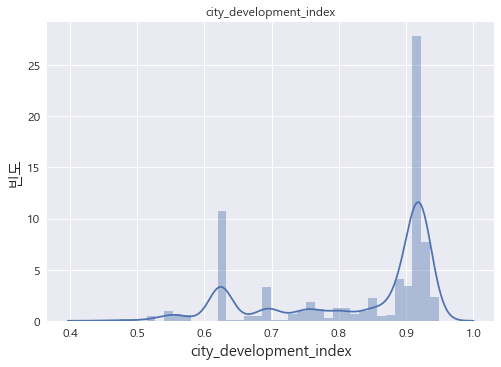

c:\users\inje.jeong\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


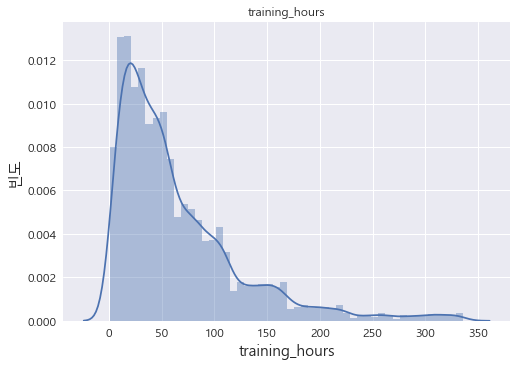

In [22]:
for nf in numerical_feature:
    sns.distplot(train.loc[train[nf].notnull(), nf])
#     sns.distplot(train[nf])
    plt.ylabel('ÎπàÎèÑ')
    plt.title(nf)
    plt.show()

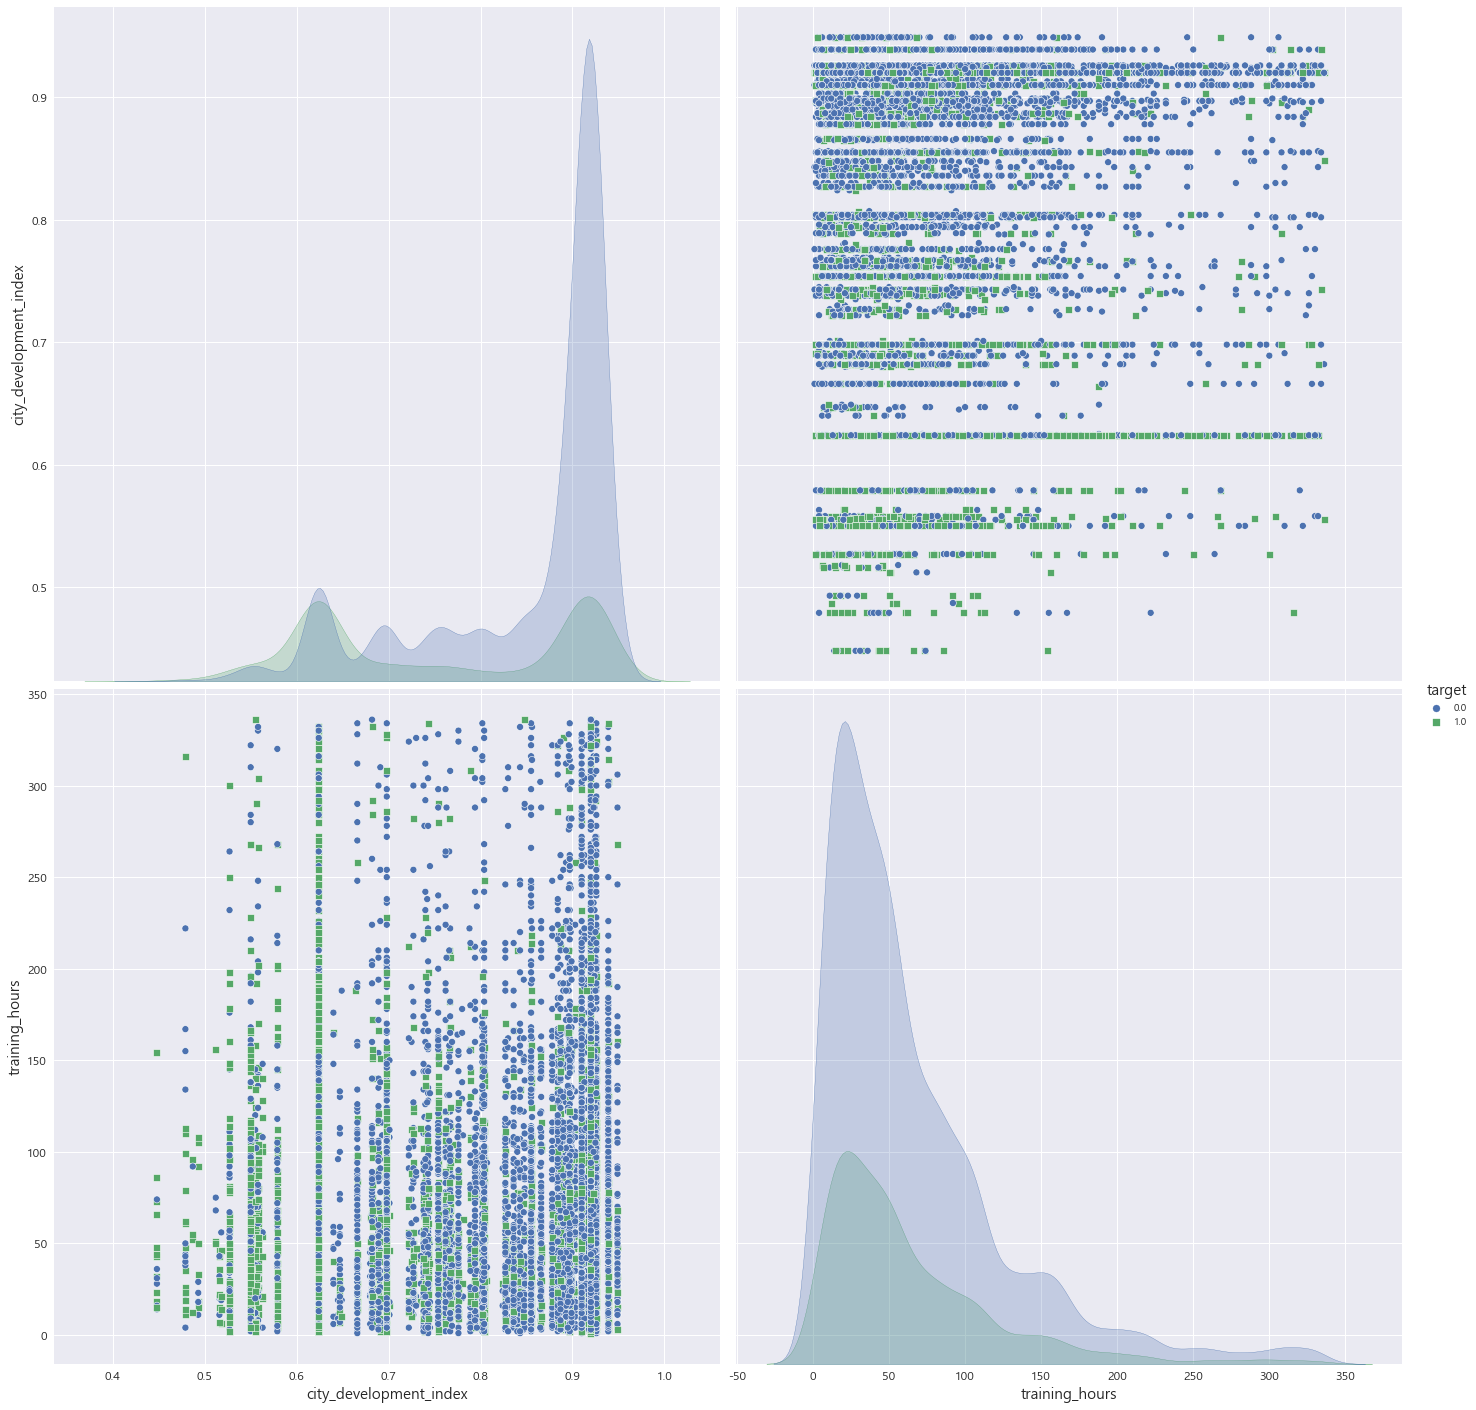

In [23]:
# numericÎ≥ÄÏàòÏôÄ targetÍ≥ºÏùò Í¥ÄÍ≥Ñ
diff = ['city_development_index', 'training_hours']

sns.pairplot(train[diff + ['target']], hue = 'target', x_vars = diff, y_vars = diff,markers=["o", "s"], height=10)
# sns.pairplot(train[diff + ['target']], hue = 'target', x_vars = diff, y_vars = diff, kind = 'hist', height=10)
plt.show()

In [17]:
# Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
for c in train.columns:
    if c == 'enrollee_id' or c == 'city_development_index' or c == 'training_hours' or c == 'target':
        continue
    print(f'üòécolumn : {c}')
    # columnsÎ≥Ñ unique, Nan ÎπÑÏú®
#     print(train[c].value_counts(normalize=True, dropna=False))
    print(train[c].value_counts(dropna=False))

üòécolumn : city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64
üòécolumn : gender
Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64
üòécolumn : relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64
üòécolumn : enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
NaN                   386
Name: enrolled_university, dtype: int64
üòécolumn : education_level
Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: education_level, dtype: int64
üòécolumn : major_discipline
STEM               14492
NaN                 2813
Humanities           669
Other           

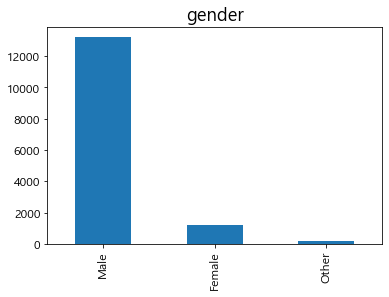

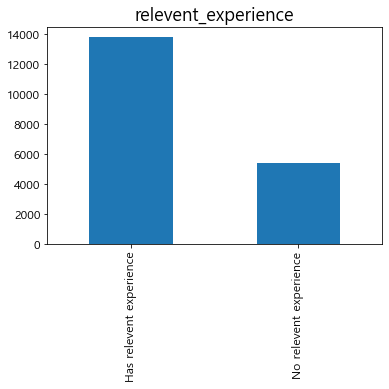

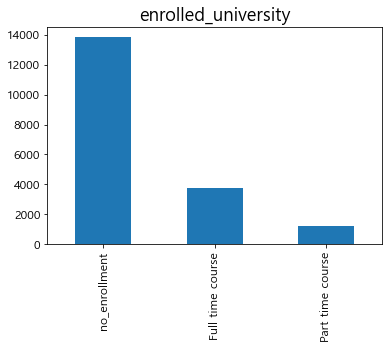

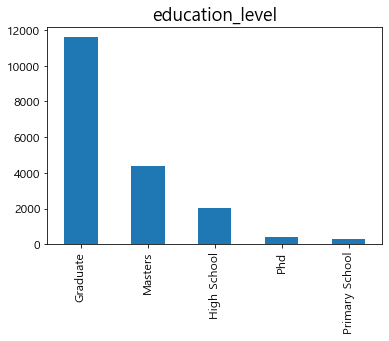

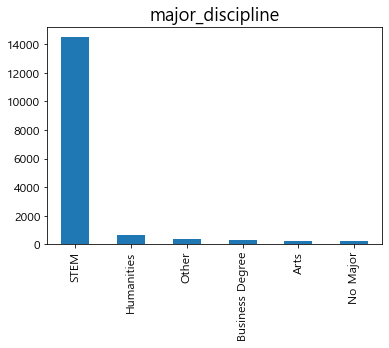

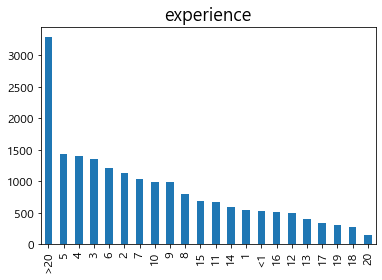

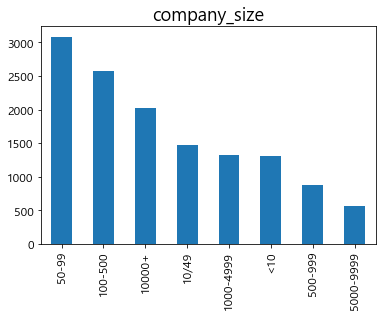

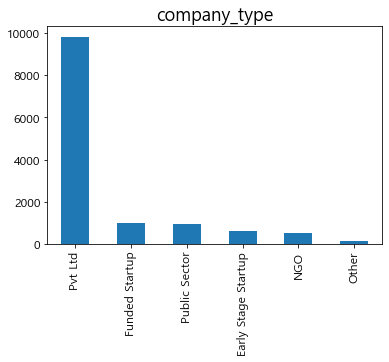

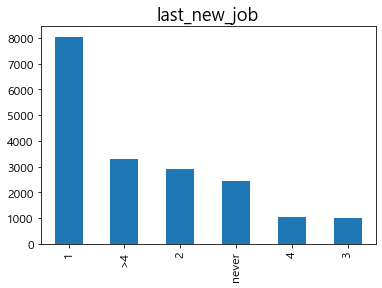

In [18]:
# Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
for c in train.columns:
    if c == 'enrollee_id' or c == 'city_development_index' or c == 'training_hour' or c == 'target' or c == 'training_hours' or c == 'city':
        continue
    train[c].value_counts().plot(kind='bar')
    plt.title(c)
    plt.show()

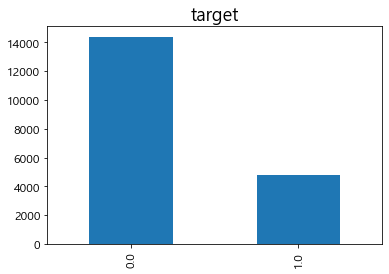

In [19]:
# yÍ∞í('target')
train['target'].value_counts().plot(kind='bar')
plt.title('target')
plt.show()

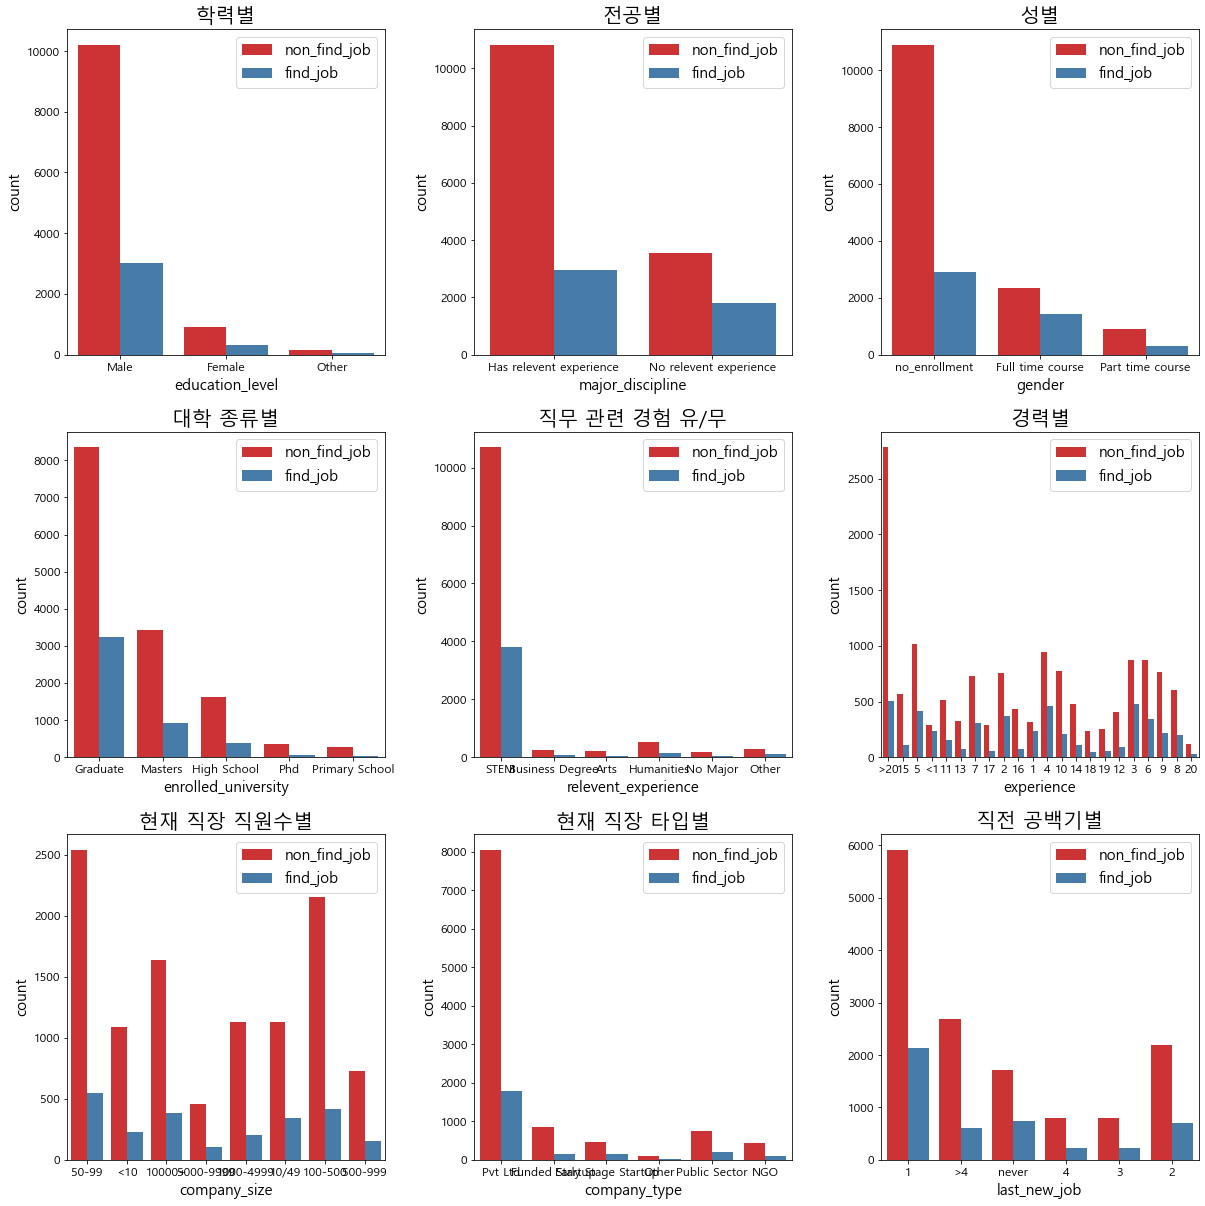

In [20]:
# Ïö∞ÏÉÅÎãò ÏΩîÎìú..! üëçüëç
# Î™ÖÎ™©Ìòï(Î≤îÏ£ºÌòï) Î≥ÄÏàòÏôÄ targetÍ≥ºÏùò Í¥ÄÍ≥Ñ
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (17, 17))

sns.set_palette("Set1") #Pastel2, Dark2, Accent, Set1
axx = axes.flatten()
i = 0

for cf in category_feature:
    sns.countplot(x = cf, hue = 'target', data = train, ax = axx[i])
    i+=1

axes[0,0].set_title('ÌïôÎ†•Î≥Ñ', fontsize=20)
axes[0,0].set_xlabel('education_level', fontsize=15)
axes[0,0].legend(['non_find_job', 'find_job'])

axes[0,1].set_title('Ï†ÑÍ≥µÎ≥Ñ', fontsize=20)
axes[0,1].set_xlabel('major_discipline', fontsize=15)
axes[0,1].legend(['non_find_job', 'find_job'])

axes[0,2].set_title('ÏÑ±Î≥Ñ', fontsize=20)
axes[0,2].set_xlabel('gender', fontsize=15)
axes[0,2].legend(['non_find_job', 'find_job'])

axes[1,0].set_title('ÎåÄÌïô Ï¢ÖÎ•òÎ≥Ñ', fontsize=20)
axes[1,0].set_xlabel('enrolled_university', fontsize=15)
axes[1,0].legend(['non_find_job', 'find_job'])

axes[1,1].set_title('ÏßÅÎ¨¥ Í¥ÄÎ†® Í≤ΩÌóò Ïú†/Î¨¥', fontsize=20)
axes[1,1].set_xlabel('relevent_experience', fontsize=15)
axes[1,1].legend(['non_find_job', 'find_job'])

axes[1, 2].set_title('Í≤ΩÎ†•Î≥Ñ', fontsize=20)
axes[1, 2].set_xlabel('experience', fontsize=15)
axes[1, 2].legend(['non_find_job', 'find_job'])

axes[2, 0].set_title('ÌòÑÏû¨ ÏßÅÏû• ÏßÅÏõêÏàòÎ≥Ñ', fontsize=20)
axes[2, 0].set_xlabel('company_size', fontsize=15)
axes[2, 0].legend(['non_find_job', 'find_job'])

axes[2, 1].set_title('ÌòÑÏû¨ ÏßÅÏû• ÌÉÄÏûÖÎ≥Ñ', fontsize=20)
axes[2, 1].set_xlabel('company_type', fontsize=15)
axes[2, 1].legend(['non_find_job', 'find_job'])

axes[2, 2].set_title('ÏßÅÏ†Ñ Í≥µÎ∞±Í∏∞Î≥Ñ', fontsize=20)
axes[2, 2].set_xlabel('last_new_job', fontsize=15)
axes[2, 2].legend(['non_find_job', 'find_job'])

plt.tight_layout()
plt.show()

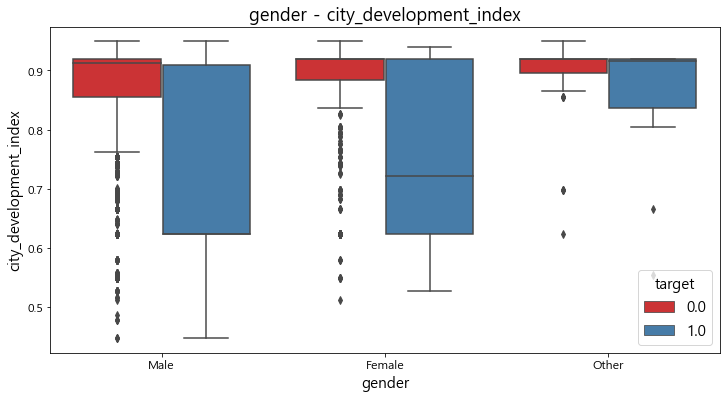

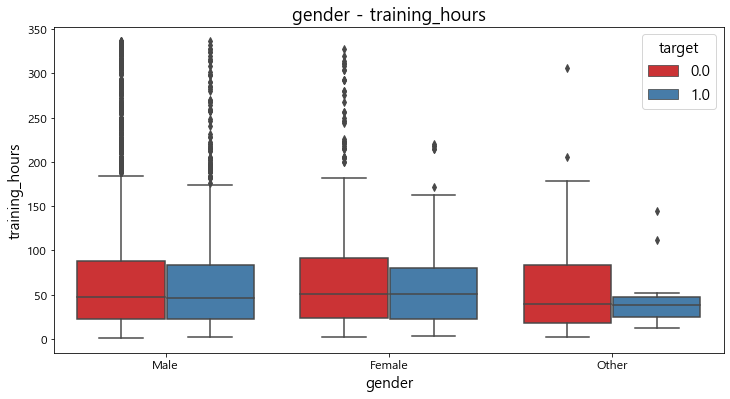

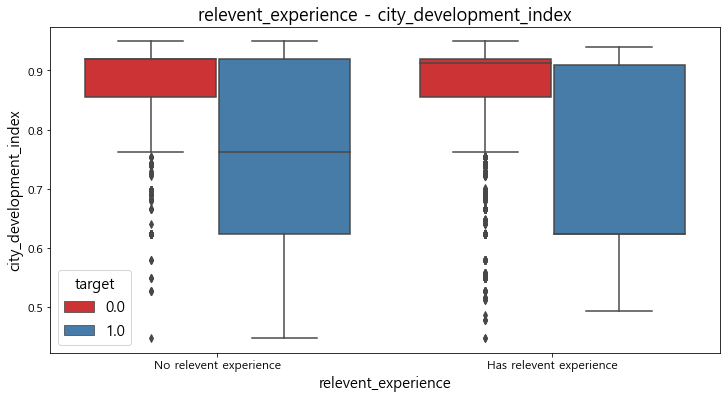

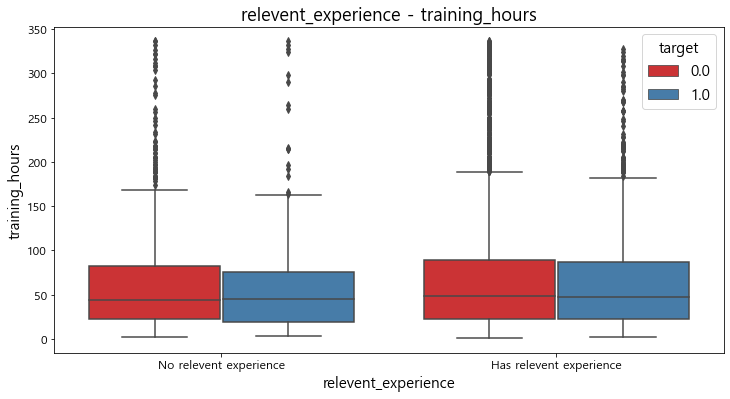

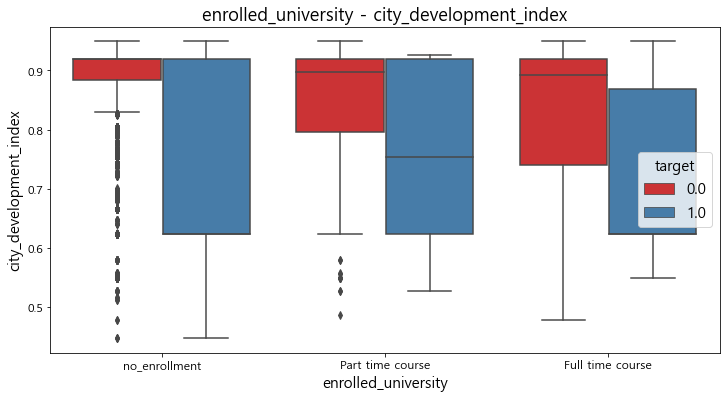

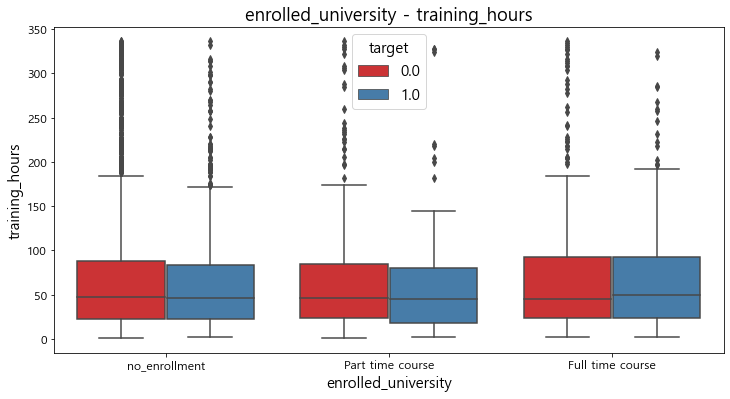

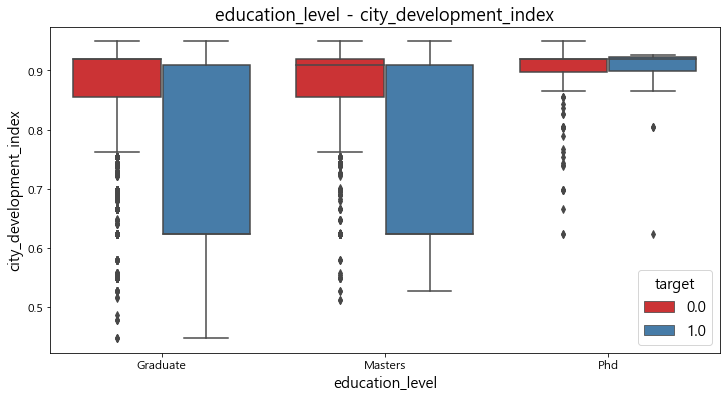

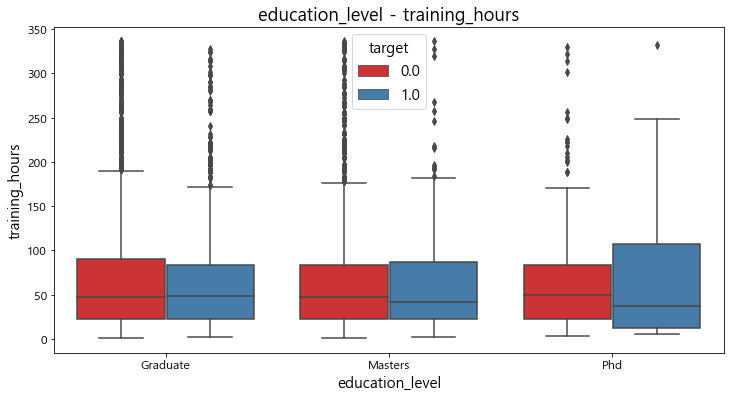

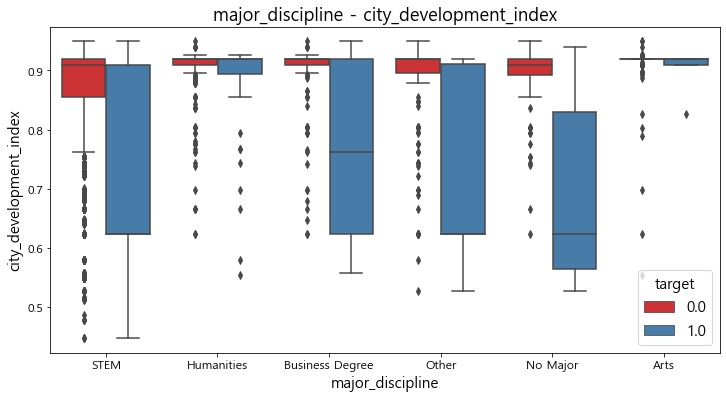

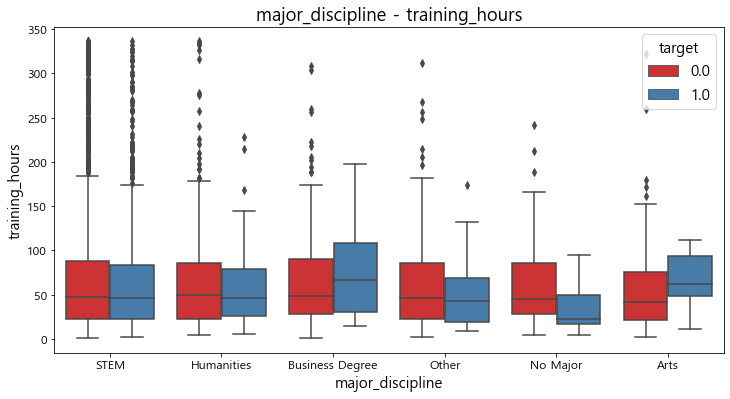

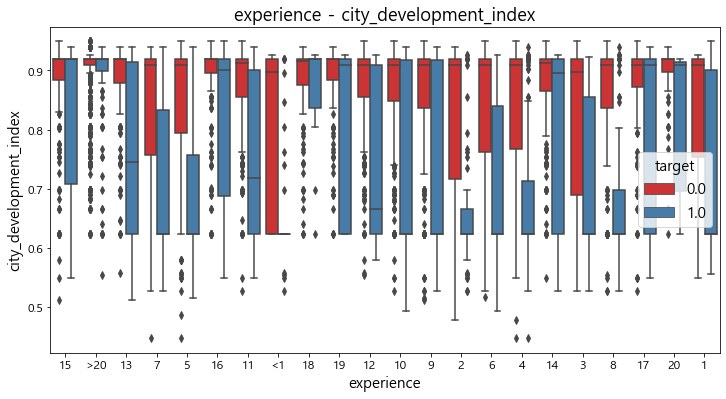

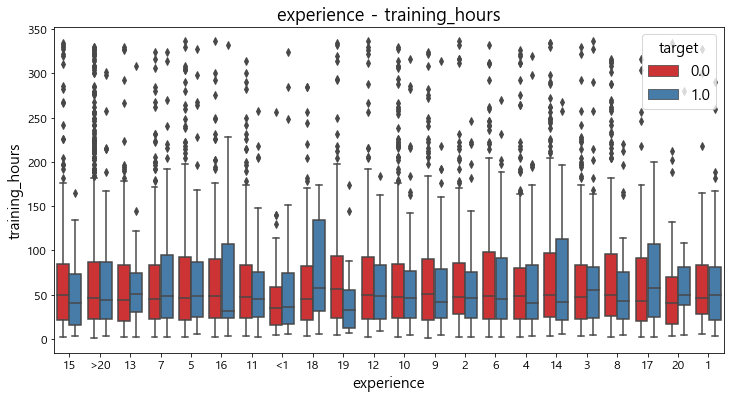

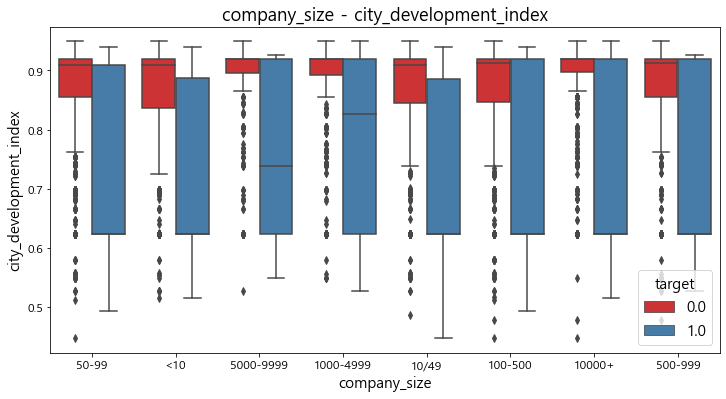

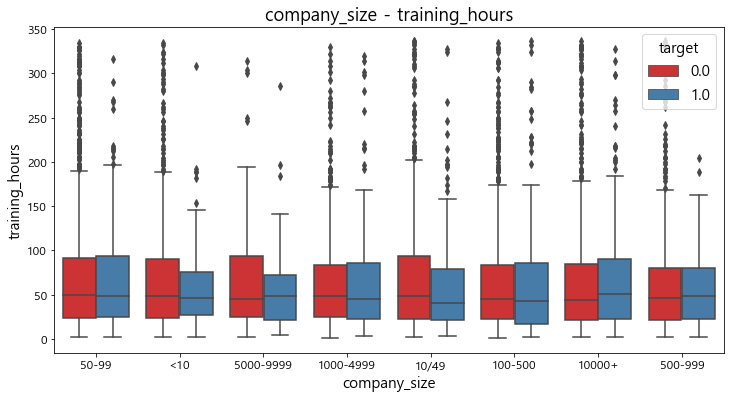

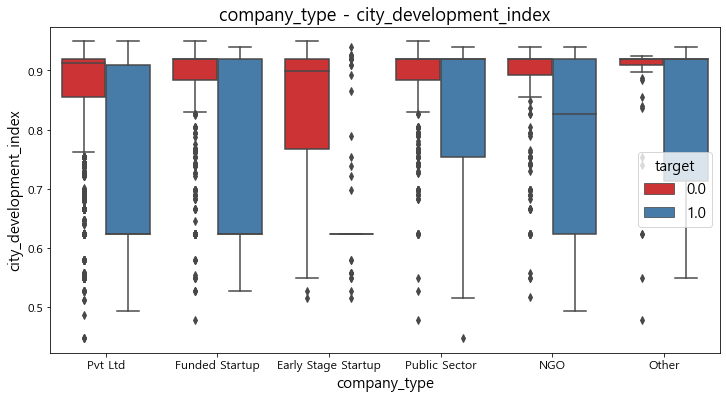

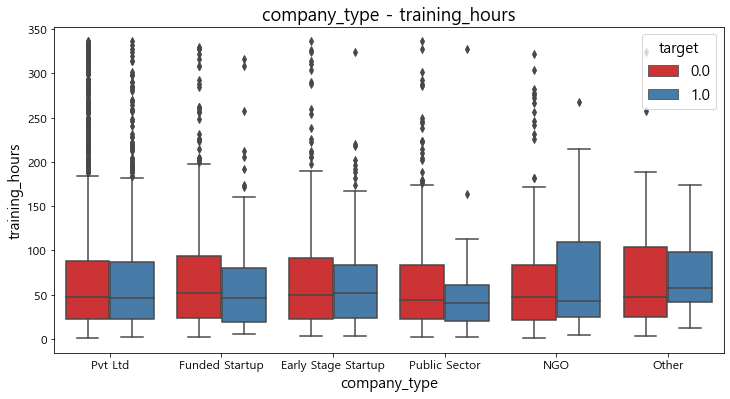

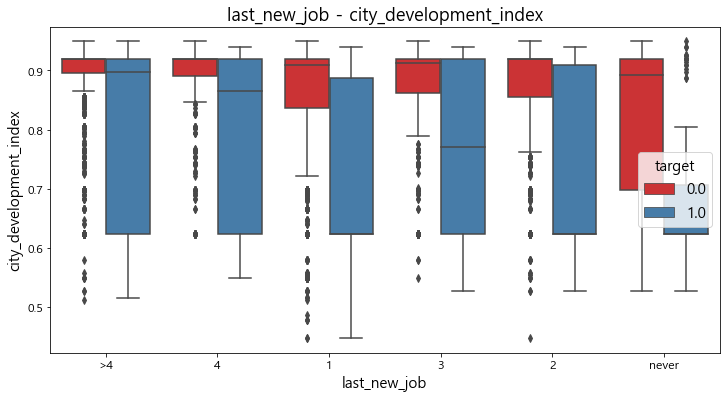

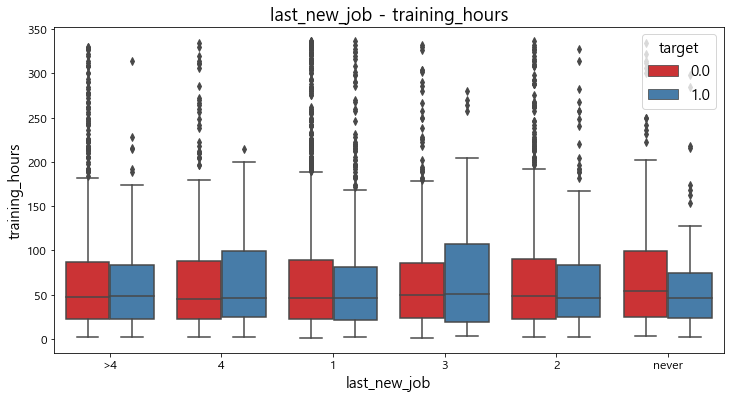

In [21]:
# ÏàòÏπòÌòï(Ïù¥ÏÇ∞Ìòï), Î™ÖÎ™©Ìòï(Î≤îÏ£ºÌòï) Î≥ÄÏàò Í∞ÑÏùò Í¥ÄÍ≥Ñ ÌÉêÏÉâ
for cf in category_feature:
    for nf in numerical_feature:
        plt.figure(figsize=(12,6))
        sns.boxplot(x=cf, y=nf, hue='target', data=train.dropna())
        plt.title(f"{cf} - {nf}")
        plt.show()

### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
- duplicate ÌôïÏù∏
- nullÍ∞í Ï≤òÎ¶¨
- outlier Ï≤òÎ¶¨

In [22]:
# Ï§ëÎ≥µÍ∞í ÌôïÏù∏ -> ÏóÜÏùå!
du = train.duplicated()
print(du.sum())
train[du]

0


Empty DataFrame
Columns: [enrollee_id, city, city_development_index, gender, relevent_experience, enrolled_university, education_level, major_discipline, experience, company_size, company_type, last_new_job, training_hours, target]
Index: []

In [23]:
# (Ïö∞ÏÑ†) NullÍ∞í Î™®Îëê ÏÇ≠Ï†ú
# -> ÏÇ≠Ï†úÌïú Îç∞Ïù¥ÌÑ∞Î°ú Îç∞Ïù¥ÌÑ∞Î≥Ñ Ï§ëÏöîÎèÑ ÌååÏïÖÌõÑ Ïª¨ÎüºÎ≥Ñ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨Î•º ÏÉùÍ∞ÅÌï¥Î≥¥Ïûê
# drop_na_train = train.dropna(axis=0)
# print(len(drop_na_train))
# ÌäπÏ†ï Ìñâ ÎòêÎäî Ïó¥ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Í≤∞Ï∏°Í∞íÏù¥ Îì§Ïñ¥ÏûàÏúºÎ©¥ Ï†úÍ±∞
# (delete specific row or column with missing values) : df[ ].dropna()
print(len(train))
train = train.dropna(axis=0)
print('->',len(train))

19158
-> 8955


In [24]:
# experienceÎ•º Categorical TypeÏúºÎ°ú Î≥ÄÌôò
# Îã§Î•∏ Î≥ÄÏàòÎèÑ Í∞ÄÎä•Ìï†Íπå? & Íµ≥Ïù¥ Î≥ÄÍ≤ΩÌïòÎäîÍ≤å Ìé∏Ìï†Íπå?
train['experience'] = pd.Categorical(train['experience'], categories = list(train['experience'].unique()))
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 1 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             8955 non-null   int64   
 1   city                    8955 non-null   object  
 2   city_development_index  8955 non-null   float64 
 3   gender                  8955 non-null   object  
 4   relevent_experience     8955 non-null   object  
 5   enrolled_university     8955 non-null   object  
 6   education_level         8955 non-null   object  
 7   major_discipline        8955 non-null   object  
 8   experience              8955 non-null   category
 9   company_size            8955 non-null   object  
 10  company_type            8955 non-null   object  
 11  last_new_job            8955 non-null   object  
 12  training_hours          8955 non-null   int64   
 13  target                  8955 non-null   float64 
dtypes: category(1), float64

### Model
- Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä
- RF
- ExtraTreesRegressor?

In [28]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
# cross validation ÌïòÍ∏∞ Ï†ÑÏóê encoding

In [26]:
# Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°ÏùÑ ÏßÑÌñâÌïòÍ∏∞ Ï†Ñ, Î¨∏Ï†úÏôÄ Ï†ïÎãµ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
# https://m.blog.naver.com/PostView.nhn?blogId=nomadgee&logNo=220812476823&proxyReferer=https:%2F%2Fwww.google.com%2F
# https://everyday-image-processing.tistory.com/82
# https://hong-yp-ml-records.tistory.com/28
train = train.sample(frac = 1, random_state = 0)
X_train = train.drop(['target'], axis = 1)
y_train = train['target']

In [33]:
# # ÏµúÏ¢ÖÎ™®Îç∏ÏùÑ ÏÑ†ÌÉùÌïòÍ≥† ÏÇ¨Ïö©Ìï† ÌîºÏ≥êÎ•º ÏÑ†ÌÉùÌïòÍ∏∞Ïóê ÏïûÏÑú cross validationÏùÑ ÌÜµÌï¥ Ïñ¥Îñ†Ìïú Í≤ΩÏö∞Í∞Ä Í∞ÄÏû• Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ ÎÇ¥ÎäîÏßÄ ÌåêÎã®ÌïòÎäî Í≥ºÏ†ï
# def rmsle(predicted_values, actual_values):
#     predicted_values = np.array(predicted_values)
#     actual_values = np.array(actual_values)

#     log_predict = np.log(predicted_values + 1)
#     log_actual = np.log(actual_values + 1)

#     difference = log_predict - log_actual
#     difference = np.square(difference)
#     mean_difference = difference.mean()
#     score = np.sqrt(mean_difference)

#     return score

# rmsle_scorer = make_scorer(rmsle)

# validation_model = ExtraTreesRegressor(n_jobs = -1, random_state = 4)
# cv = KFold(2, shuffle=True, random_state=4)
# scores = cross_val_score(validation_model, X_train, y_train, cv=cv, scoring=rmsle_scorer)

# print("ÍµêÏ∞® Í≤ÄÏ¶ù Ï†êÏàò: {}". format(scores))
# print("ÍµêÏ∞® Í≤ÄÏ¶ù ÌèâÍ∑† Ï†êÏàò: {:.2f}".format(scores.mean()))

In [34]:
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# scores2 = cross_val_score(logreg, X_train, y_train)

# print(f'cross-val-score : {scores2}')
# print(f'cross-val-score.mean : {scores2.mean()}')

cross-val-score : [nan nan nan nan nan]
cross-val-score.mean : nan


In [38]:
# from sklearn import datasets
# iris = datasets.load_iris()
# print(iris.data)
# print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
